# Explore
각 데이터의 형태와 내용을 간단히 살펴봅니다.

# Import modules

In [17]:
# enable in-line MatPlotLib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

In [4]:
from collections import Counter
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv("dataset.tsv", delimiter='\t')

In [7]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
0,58,management,married,고학력,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,중학력,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,중학력,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


# Data Summaries

In [8]:
df.describe()

,x1,x6,x10,x12,x13,x14
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,41.068150,1517.338050,15.749375,2.751550,40.739850,0.594400
std,10.745571,3150.922909,8.296992,3.070856,100.295911,2.347014
min,18.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,146.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,543.000000,16.000000,2.000000,-1.000000,0.000000
75%,49.000000,1595.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


x6, x13, x14의 분포가 치우쳐 있거나 out-lier가 있을 확률이 높은 것을 알 수 있습니다.

In [9]:
# Replace Korean with English & Encode
replace_dict = {
    "x4":{"저학력":"low", "중학력":"middle", "고학력":"high"},
    "x9":{"유선":"wired", '무선':"wireless"},
    "x11":{"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, \
           "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12}
    }
df.replace(replace_dict, inplace=True)

In [23]:
# Incidences of each variables
for col in list(df):
    print()
    print(df[col].value_counts().sort_index())


18      12
19      34
20      47
21      69
22     122
23     184
24     254
25     470
26     690
27     802
28     908
29    1038
30    1530
31    1748
32    1858
33    1759
34    1697
35    1668
36    1595
37    1502
38    1290
39    1315
40    1171
41    1122
42    1079
43    1003
44     981
45    1048
46    1046
47     960
      ... 
65      57
66      63
67      52
68      36
69      43
70      66
71      52
72      52
73      42
74      37
75      37
76      31
77      43
78      27
79      23
80      31
81      17
82      18
83      21
84       9
85       5
86       8
87       4
88       2
89       3
90       2
92       2
93       2
94       1
95       2
Name: x1, dtype: int64

admin.           4524
blue-collar      8312
entrepreneur     1320
housemaid        1153
management       8591
retired          2060
self-employed    1442
services         3545
student           899
technician       6689
unemployed       1190
unknown           275
Name: x2, dtype: int64

divorced     448

In [19]:
# Function to plot each data
def plot_data(df, col, numeric_list):
    counts = df.groupby(df[col].name).size()
    counts_of_yes = df[df['y']=='yes'].groupby(df[col].name).size()
    yes_prob = counts_of_yes / counts

    s = pd.Series(Counter(df[col]))
    
    f, (ax1, ax2) = sns.plt.subplots(nrows=2)
    if col in numeric_list:
        sns.tsplot(data=s, ax=ax1)
        sns.tsplot(data=yes_prob, ax=ax2)
    else:
        sns.barplot(x=s.index.values, y=s, ax=ax1)
        sns.barplot(x=yes_prob.index.values, y=yes_prob, ax=ax2)
    ax1.set(ylabel="Incidences")
    ax2.set(ylabel="Probability of Yes")
    sns.plt.title(df[col].name)
    sns.plt.show()

# Look around
다른 변수가 동일하다는 가정하에 각 변수 데이터의 특징을 간단히 살펴봅니다.

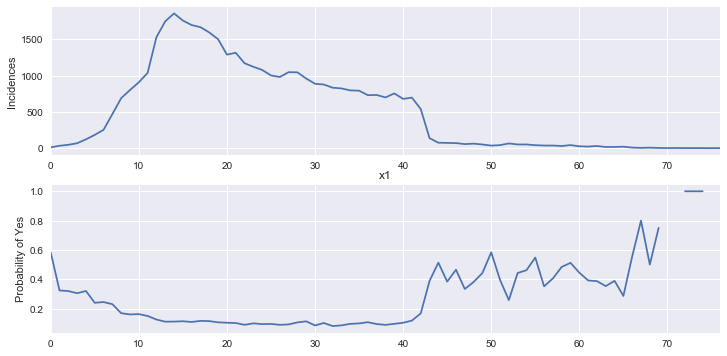

In [20]:
numeric_list = ['x1', 'x6']

# Plot x1
plot_data(df=df, col='x1', numeric_list=numeric_list)

예금 가입 확률(Probability of Yes, 이하 PY)는 (The num. of yes / The num. of counts)로 계산하였습니다.
위쪽 그래프에서, 텔레마케팅(이하 TM) 대상은 주로 10대에서 40대까지 분포하며, 10대 연령이 가장 많은 것으로 나타납니다.
아래쪽 그래프에서, TM 대상과는 상반되게 PY는 40대 중반 이후에 상대적으로 높게 나타납니다.80대까지는 out-lier로 보기 힘든 sample 숫자입니다.
40대 이후일수록 TM 성공 확률이 높을 것으로 예상됩니다.

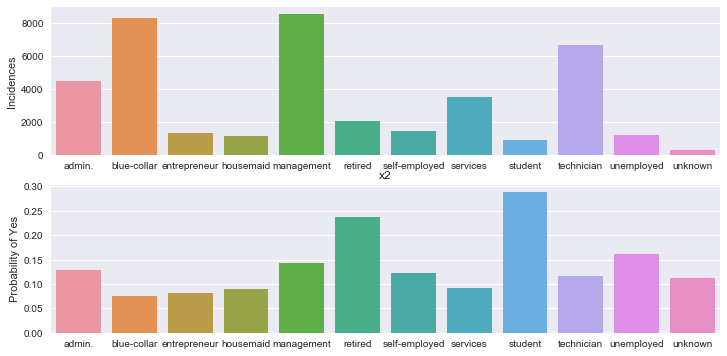

In [24]:
# Plot x2
plot_data(df=df, col='x2', numeric_list=numeric_list)

위 그래프에서, TM 대상은 management, blue-collar, technician, admin. 쪽에 집중되어 있습니다.

아래 그래프에서는 student, retired의 PY가 높게 나타납니다. student, retired, management 순의 TM 확대가 필요할 것으로 생각됩니다.

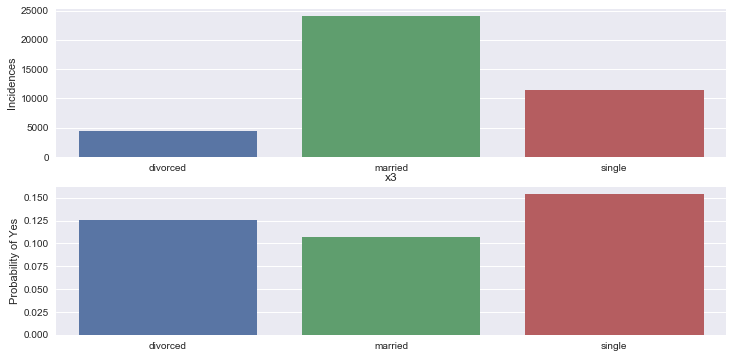

In [25]:
# Plot x3
plot_data(df=df, col='x3', numeric_list=numeric_list)

TM 대상은 married에 많이 분포하지만, PY에는 결혼여부에 따른 차이가 크지 않은 것으로 보입니다.

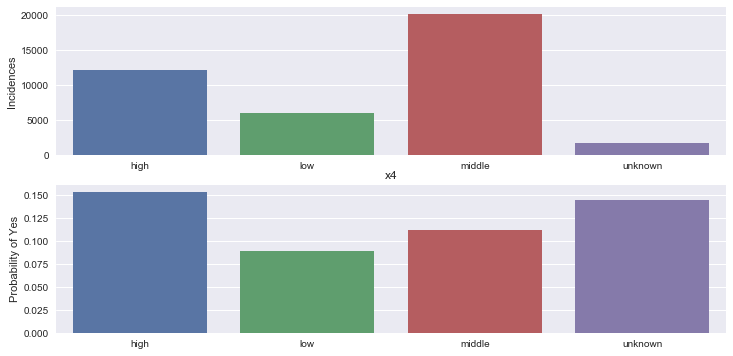

In [26]:
# Plot x4
plot_data(df=df, col='x4', numeric_list=numeric_list)

TM 대상은 middle 부분에서 높게 나타나며, 교육 수준이 높을수록 PY가 높은 경향이 나타납니다.

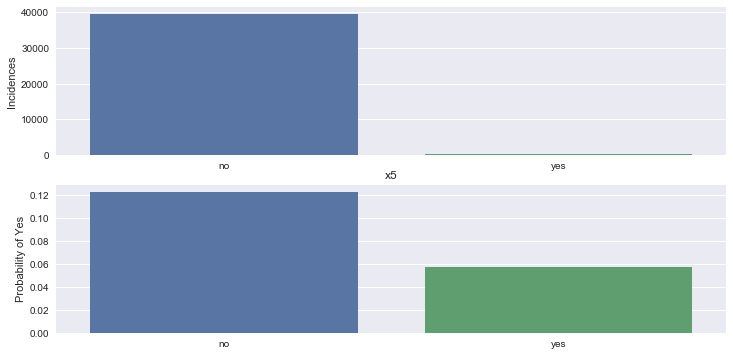

In [27]:
# Plot x5
plot_data(df=df, col='x5', numeric_list=numeric_list)

TM 대상이 채무불이행일 확률은 매우 낮게 나타납니다. 채무불이행인 경우는 PY가 낮습니다.

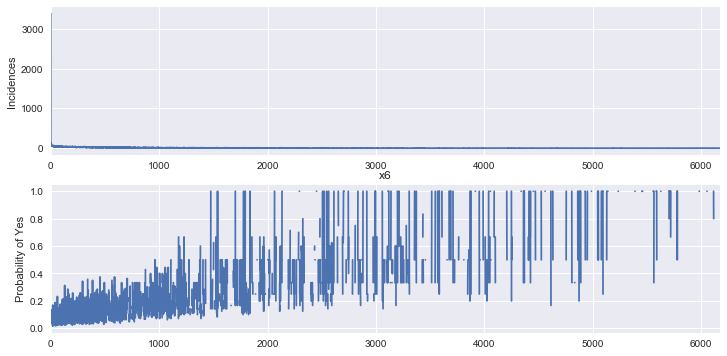

In [29]:
# Plot x6
plot_data(df=df, col='x6', numeric_list=numeric_list)

TM대상은 연평균잔고가 0인 경우가 앞도적으로 많았습니다. PY는 연평균잔고와 비례하여 늘어나는 경향이 보입니다.

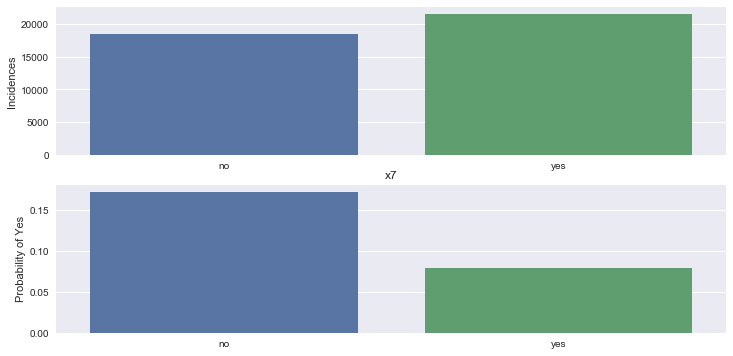

In [31]:
# Plot x7
plot_data(df=df, col='x7', numeric_list=numeric_list)

TM 대상은 주택자금대출 여부와 무관하게 골고루 분포합니다. PY는 주택자금대출이 없을 경우 높게 나타납니다.

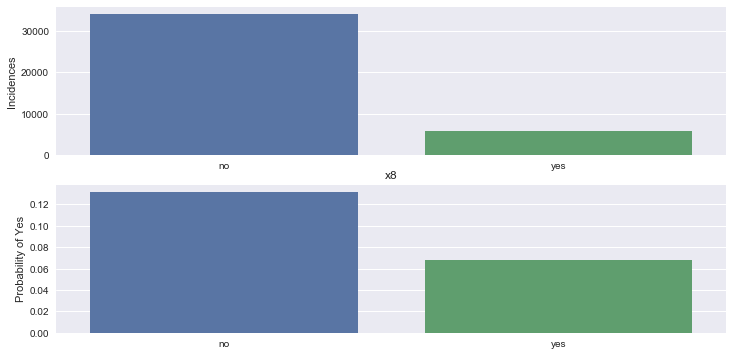

In [33]:
# Plot x8
plot_data(df=df, col='x8', numeric_list=numeric_list)

채무불이행의 경우와 비슷한 결과입니다. TM 대상은 개인신용대출이 없는 경우가 많았고, PY도 개인신용대출이 없는 경우 더 높게 나타납니다.

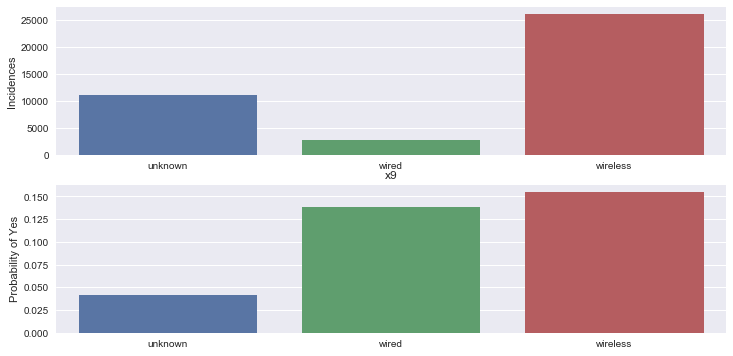

In [35]:
# Plot x9
plot_data(df=df, col='x9', numeric_list=numeric_list)

주로 무선을 통한 TM이 많았으며, PY에는 무선/유선 여부와 상관성이 크지 않은 것으로 나타납니다.

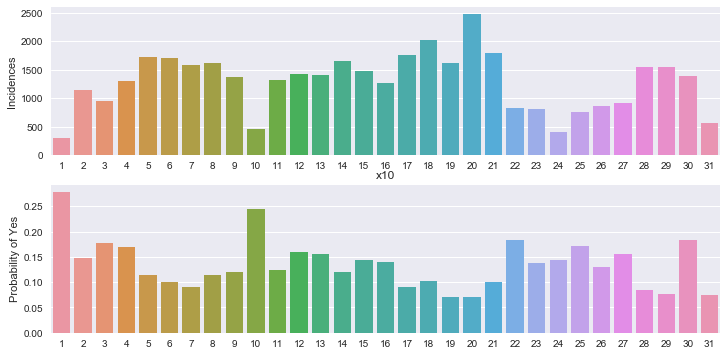

In [36]:
# Plot x10
plot_data(df=df, col='x10', numeric_list=numeric_list)

일별 마지막으로 TM이 진행된 수는 약한 seasonality가 있는 것으로 보입니다.
PY는 이와 반대의 seasonality 경향이 나타납니다. 서로 인과관계가 있는지는 알 수 없습니다.

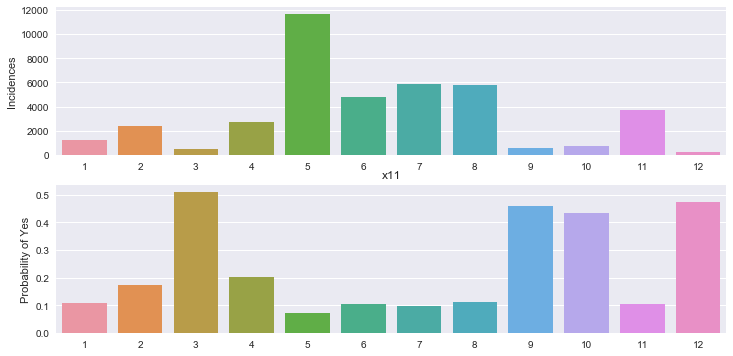

In [37]:
# Plot x11
plot_data(df=df, col='x11', numeric_list=numeric_list)

월별 TM 횟수는 5월에서 8월에 집중된 것으로 나타납니다.
반면 PY는 3월, 9월, 10월, 12월에 높은 것으로 나타납니다.

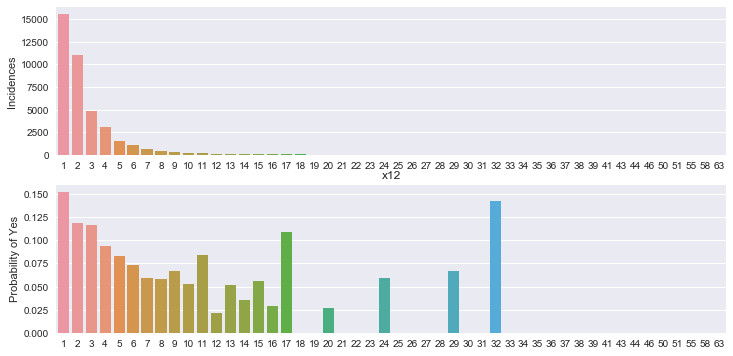

In [38]:
# Plot x12
plot_data(df=df, col='x12', numeric_list=numeric_list)

현재 캠페인에서 고객에게 연락한 횟수가 적을수록 PY가 높게 나타납니다. (17번 이후는 out-lier로 볼 수 있습니다)

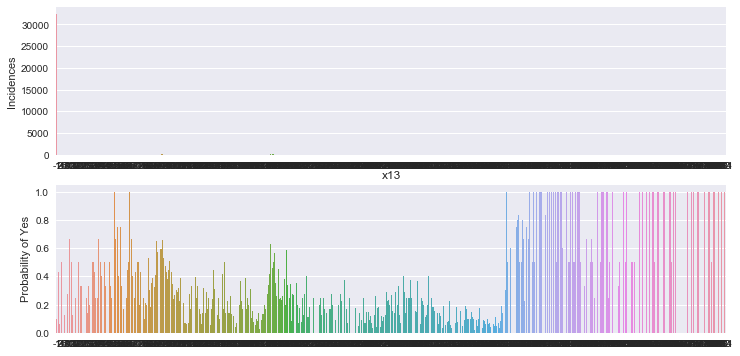

In [40]:
# Plot x13
plot_data(df=df, col='x13', numeric_list=numeric_list)

이전 캠페인에 연락되지 않은 경우가 압도적으로 많습니다. PY와 이전 캠페인의 연락으로부터의 경과일은 큰 연관성이 나타나지 않은 것으로 보입니다.

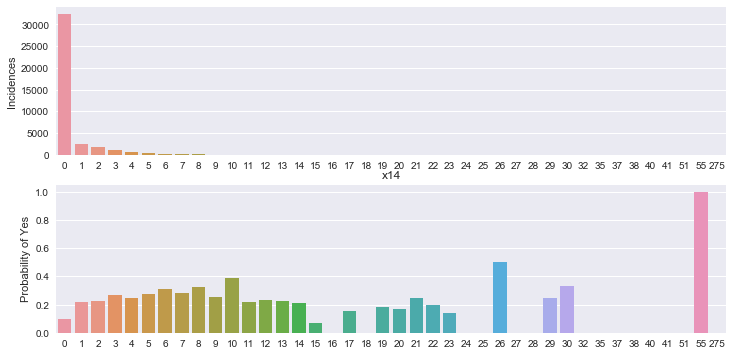

In [41]:
# Plot x14
plot_data(df=df, col='x14', numeric_list=numeric_list)

현재 캠페인에서 처음 TM을 진행한 경우가 압도적으로 많습니다. PY와 현재 캠페인 연락 횟수는 큰 연관성이 나타나지 않은 것으로 보입니다.

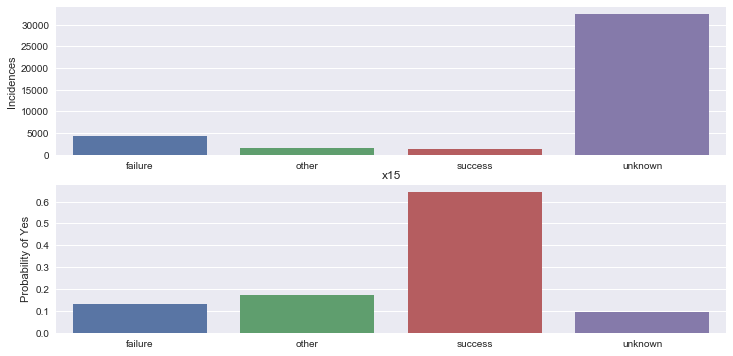

In [43]:
# Plot x15
plot_data(df=df, col='x15', numeric_list=numeric_list)

이전 캠페인의 결과를 모르는 경우가 많습니다.
PY는 이전 캠페인의 결과가 성공적일 경우 높게 나타납니다. 이전 캠페인 결과에 대한 정확한 자료 수집이 필요해 보입니다.

# Conclusion
정기예금 가입 여부 예측에 도움이 될 것으로 보이는 변수는 아래와 같습니다.

x1(연령), x2(직업), x5(채무불이행 여부), x6(연평균 잔고), x7(주택자금대출 여부), x8(개인신용대출 여부), x10/x11(마지막 연락 시점), x12(현재 캠페인 연락횟수), x15(이전 캠페인 결과)